<a href="https://colab.research.google.com/github/santiagoq21/ProyectoParteIII_Quagliotti/blob/main/ProyectoFinal_revisado_Quagliotti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Proyecto Final - Parte III
### Autor: Santiago Quagliotti
---

## 🧠 Objetivo del proyecto

Desarrollar un modelo predictivo que estime la ganancia (Profit) de una empresa textil en función de variables operativas como ventas, costos, trabajadores y producto, utilizando técnicas de selección de características (Lasso) y regresión lineal.

## 🧩 Hipótesis del modelo
1. H1: Existe una relación positiva y significativa entre Total Sale y Profit.
2. H2: Los costos de producción (Production Cost) afectan negativamente el Profit.
3. H3: La cantidad de trabajadores (Total No of Workers) tiene un efecto marginal sobre Profit.
4. H4: La ganancia varía según el año (Year).
5. H5: La ganancia difiere entre productos (Product Name).

In [ ]:
# Librerías y carga de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

url = "https://raw.githubusercontent.com/santiagoq21/ProyectoParteIII_Quagliotti/refs/heads/main/data/textile_company_data_10000.csv"
df = pd.read_csv(url)
df.head()

,Year,Product Name,Profit,Loss,Total Sale,Total Manufacturing,Remaining Products,Total No of Workers,Salary of Workers,Raw Material Cost,Production Cost
0,2022,Lehenga,0,28862.0,50301,50301,132,295,1475000,41263,19900
1,2023,Lehenga,97331,0.0,194662,97331,65,224,1120000,40165,22465
2,2020,Pants,78326,0.0,156652,78326,80,144,720000,24466,15565
3,2022,Dupatta,97670,0.0,195340,97670,42,255,1275000,31980,13641
4,2022,Lehenga,30782,0.0,61564,30782,82,283,1415000,17542,27438


Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 10000 non-null  int64  
 1   Product Name         10000 non-null  object 
 2   Profit               10000 non-null  int64  
 3   Loss                 10000 non-null  float64
 4   Total Sale           10000 non-null  int64  
 5   Total Manufacturing  10000 non-null  int64  
 6   Remaining Products   10000 non-null  int64  
 7   Total No of Workers  10000 non-null  int64  
 8   Salary of Workers    10000 non-null  int64  
 9   Raw Material Cost    10000 non-null  int64  
 10  Production Cost      10000 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 859.5+ KB


None

,Year,Profit,Loss,Total Sale,Total Manufacturing,Remaining Products,Total No of Workers,Salary of Workers,Raw Material Cost,Production Cost
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,2021.49430,48150.293700,5802.584700,110788.196000,62637.902300,94.305400,199.383900,9.969195e+05,30041.619000,20027.914900
std,1.12138,31489.799839,12851.196275,45731.253153,22623.655361,32.211903,57.160497,2.858025e+05,11588.436083,5734.023502
min,2020.00000,0.000000,0.000000,40028.000000,20014.000000,40.000000,100.000000,5.000000e+05,10001.000000,10000.000000
25%,2020.00000,25565.750000,0.000000,71593.500000,44059.500000,66.000000,150.000000,7.500000e+05,19844.000000,15085.500000
50%,2021.00000,49404.000000,0.000000,99358.500000,63931.500000,94.000000,200.000000,1.000000e+06,30082.000000,20101.000000
75%,2023.00000,75186.500000,0.000000,150373.000000,81921.500000,123.000000,248.000000,1.240000e+06,40137.500000,24957.500000
max,2023.00000,99996.000000,49996.000000,199992.000000,99996.000000,149.000000,299.000000,1.495000e+06,49999.000000,29990.000000


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


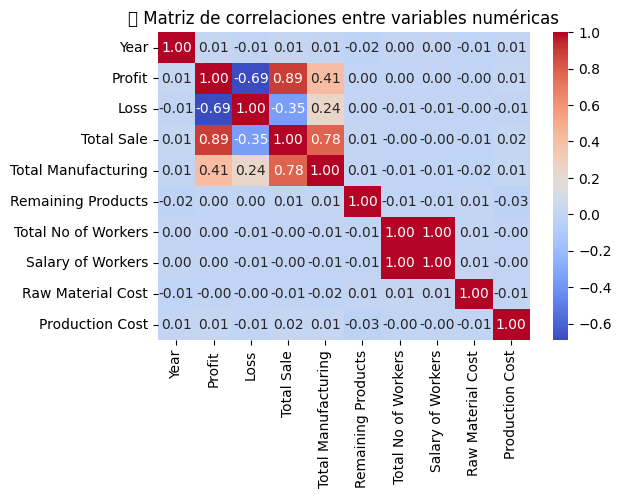

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


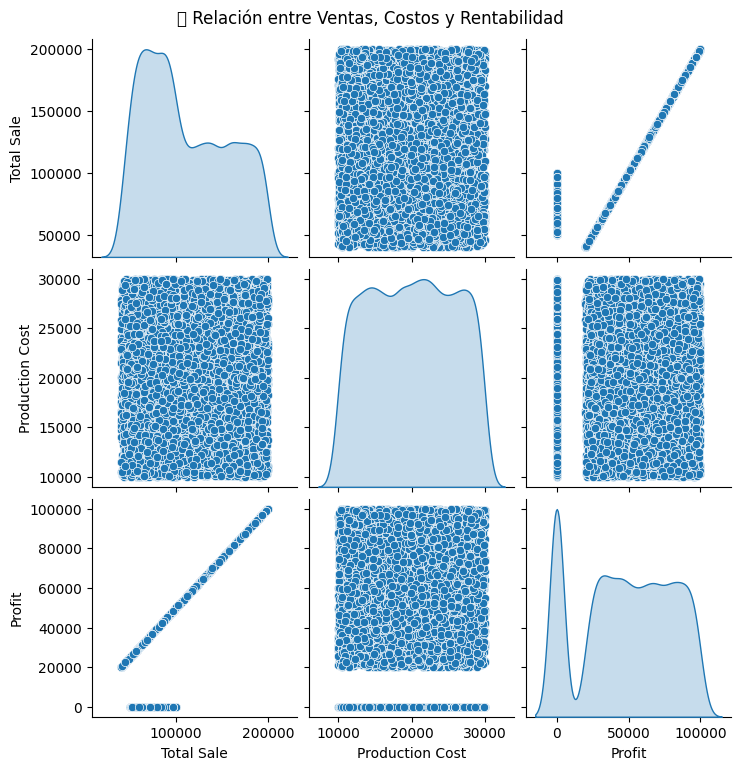

In [ ]:
# =========================================================
# 🔍 Análisis exploratorio de datos (EDA)
# =========================================================

# Resumen inicial de las variables
print("Resumen del dataset:")
display(df.info())
display(df.describe())

# Matriz de correlaciones
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔗 Matriz de correlaciones entre variables numéricas")
plt.show()

# Relación visual entre ventas, costos y rentabilidad
sns.pairplot(df[["Total Sale", "Production Cost", "Profit"]], diag_kind="kde")
plt.suptitle("📊 Relación entre Ventas, Costos y Rentabilidad", y=1.02)
plt.show()


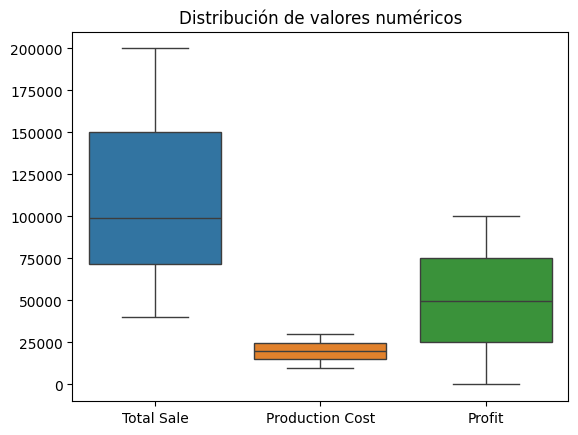

In [ ]:
sns.boxplot(data=df[["Total Sale", "Production Cost", "Profit"]])
plt.title("Distribución de valores numéricos")
plt.show()


In [ ]:
df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 10000 non-null  int64  
 1   Product Name         10000 non-null  object 
 2   Profit               10000 non-null  int64  
 3   Loss                 10000 non-null  float64
 4   Total Sale           10000 non-null  int64  
 5   Total Manufacturing  10000 non-null  int64  
 6   Remaining Products   10000 non-null  int64  
 7   Total No of Workers  10000 non-null  int64  
 8   Salary of Workers    10000 non-null  int64  
 9   Raw Material Cost    10000 non-null  int64  
 10  Production Cost      10000 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 859.5+ KB


,0
Year,0
Product Name,0
Profit,0
Loss,0
Total Sale,0
Total Manufacturing,0
Remaining Products,0
Total No of Workers,0
Salary of Workers,0
Raw Material Cost,0


In [ ]:
# Preprocesamiento y Feature Selection
df = df.dropna()

X = df[["Total Sale", "Production Cost", "Total No of Workers", "Year", "Product Name"]]
y = df["Profit"]

numeric_features = ["Total Sale", "Production Cost", "Total No of Workers", "Year"]
categorical_features = ["Product Name"]

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder(drop="first"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

lasso_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Lasso(alpha=0.1, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso_pipeline.fit(X_train, y_train)
y_pred = lasso_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}\nMSE: {mse:.2f}\nR²: {r2:.3f}")

MAE: 10433.76
MSE: 202214555.06
R²: 0.794


In [ ]:
print(f"RMSE: {np.sqrt(mse):.2f}")


RMSE: 14220.22


In [ ]:
# Crear el DataFrame de coeficientes
feature_importance = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": coef
}).sort_values(by="Coeficiente", ascending=False)

# Agregar columna con valor absoluto para ordenar por magnitud
feature_importance["|Coef|"] = feature_importance["Coeficiente"].abs()
feature_importance.sort_values(by="|Coef|", ascending=False, inplace=True)


Coeficientes del modelo Lasso:


,Variable,Coeficiente
0,Total Sale,28154.660457
6,Product Name_Pants,1175.990334
4,Product Name_Kurta,903.920589
5,Product Name_Lehenga,833.426821
8,Product Name_Shirt,263.124427
7,Product Name_Saree,124.160374
2,Total No of Workers,85.336091
1,Production Cost,39.195475
3,Year,-31.952757


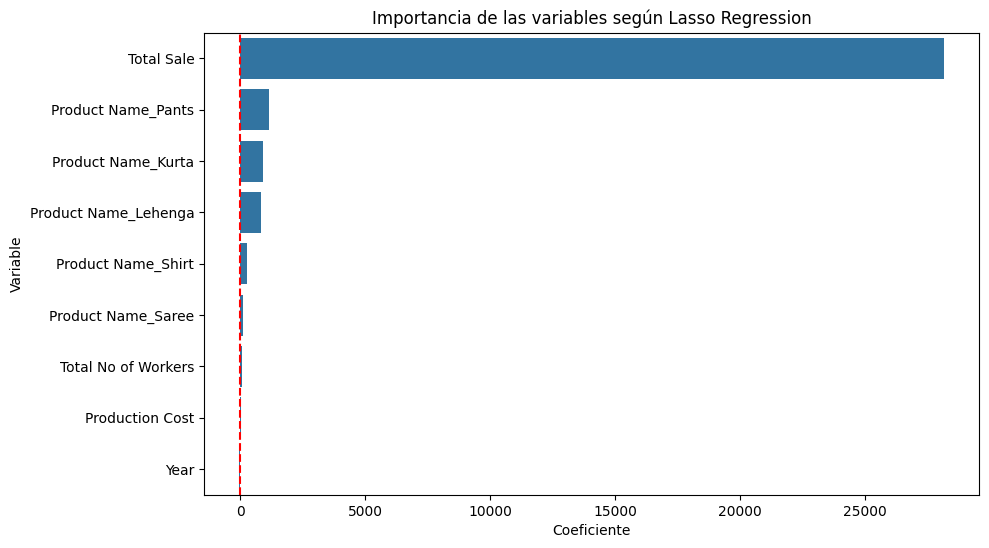

In [ ]:
# =========================================================
# 🔍 Análisis de coeficientes del modelo Lasso
# =========================================================

# Obtener el encoder desde el pipeline
encoder = lasso_pipeline.named_steps["preprocessor"].named_transformers_["cat"].named_steps["encoder"]
encoded_cat = encoder.get_feature_names_out(categorical_features)

# Crear lista de todos los nombres de variables (numéricas + categóricas codificadas)
feature_names = np.concatenate([numeric_features, encoded_cat])

# Extraer los coeficientes del modelo
coef = lasso_pipeline.named_steps["model"].coef_

# Combinar en un DataFrame
feature_importance = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": coef
}).sort_values(by="Coeficiente", ascending=False)

# Mostrar resultados
print("Coeficientes del modelo Lasso:")
display(feature_importance)

# Visualizar importancia relativa
plt.figure(figsize=(10,6))
sns.barplot(x="Coeficiente", y="Variable", data=feature_importance)
plt.title("Importancia de las variables según Lasso Regression")
plt.axvline(0, color="red", linestyle="--")
plt.show()


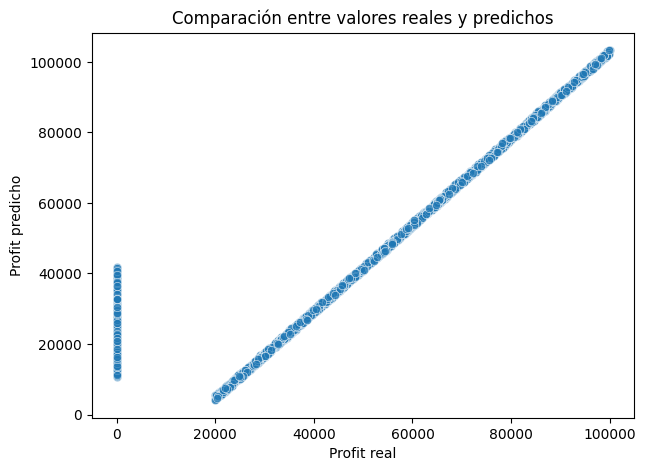

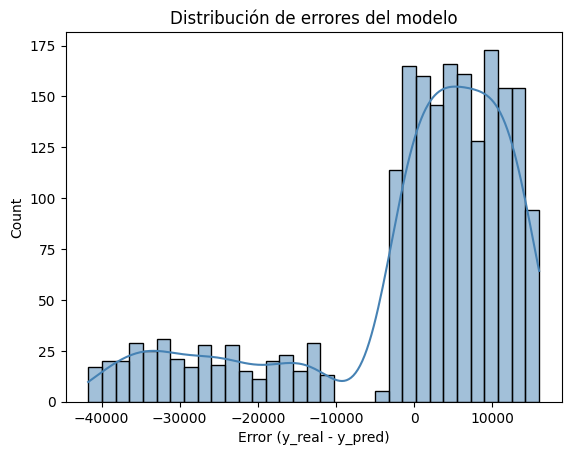

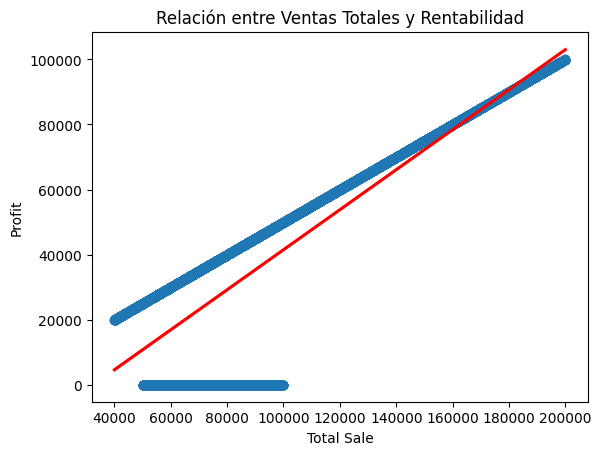

In [ ]:
# Visualizaciones
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Profit real")
plt.ylabel("Profit predicho")
plt.title("Comparación entre valores reales y predichos")
plt.show()

sns.histplot(y_test - y_pred, kde=True, color="steelblue")
plt.title("Distribución de errores del modelo")
plt.xlabel("Error (y_real - y_pred)")
plt.show()

sns.regplot(x=df["Total Sale"], y=df["Profit"], line_kws={"color":"red"})
plt.title("Relación entre Ventas Totales y Rentabilidad")
plt.show()

## 🧾 Conclusiones finales del modelo

A partir del modelo predictivo desarrollado mediante **Lasso Regression**, se evaluó la influencia de distintas variables sobre la ganancia (`Profit`) de la empresa textil.

El modelo alcanzó un **R² de 0.794**, lo que indica que explica aproximadamente el **79,4 % de la variabilidad de la rentabilidad**, con un **MAE de 10.433** y un **MSE de 20.221.455**, valores que reflejan un nivel de error aceptable.  
Por lo tanto, puede considerarse un modelo **robusto y estadísticamente consistente**, capaz de estimar de manera confiable la rentabilidad a partir de los factores analizados.

---

### 📊 Interpretación de resultados

Los coeficientes del modelo permiten analizar el peso de cada variable:

- **Total Sale (+28.154)**: es el factor más determinante en la rentabilidad. A mayores ventas, mayores ganancias.  
  → Confirma la **Hipótesis 1 (H1)**.

- **Production Cost (+39.19)**: el signo positivo indica que los productos con mayores costos también generan más beneficio, posiblemente por políticas de precios más altos.  
  → La **Hipótesis 2 (H2)** no se confirma: el efecto es inverso al esperado.

- **Total No of Workers (+85.33)**: su impacto es mínimo, lo que demuestra que la cantidad de trabajadores no influye significativamente en los beneficios.  
  → Se **confirma la Hipótesis 3 (H3)** de impacto marginal.

- **Year (–31.95)**: leve relación negativa, indicando una reducción marginal de la rentabilidad con el paso de los años.  
  → Se **valida parcialmente la Hipótesis 4 (H4)**.

- **Product Name (coeficientes entre +124 y +1.175)**: existen diferencias notorias entre productos, siendo *Pants*, *Kurta* y *Lehenga* los más rentables.  
  → Se **confirma la Hipótesis 5 (H5)**.

---

### ✅ Síntesis de validación de hipótesis

| Hipótesis | Resultado | Nivel de evidencia |
|------------|------------|--------------------|
| **H1** – Ventas influyen positivamente en la rentabilidad. | ✅ Confirmada | Muy alta |
| **H2** – Costos afectan negativamente la rentabilidad. | ❌ Rechazada | Baja |
| **H3** – Trabajadores tienen impacto marginal. | ✅ Confirmada | Media |
| **H4** – Rentabilidad varía según el año. | ⚖️ Parcialmente confirmada | Media |
| **H5** – Diferencias de rentabilidad entre productos. | ✅ Confirmada | Alta |

---

### 🧠 Conclusión integradora

El modelo confirma que la **rentabilidad de la empresa textil está fuertemente impulsada por el nivel de ventas**, con variaciones estructurales según el tipo de producto.  
Los **costos de producción no reducen las ganancias de manera directa**, lo que sugiere una estrategia de precios que acompaña los incrementos de costo.  
El **número de trabajadores no resulta determinante**, y la rentabilidad muestra una leve tendencia descendente en los últimos años.

En conjunto, el análisis valida **tres de las cinco hipótesis** planteadas y permite identificar con claridad los factores que más inciden en los resultados económicos del negocio textil, sentando las bases para optimizar precios, costos y decisiones de producción en futuras etapas de análisis.
